# Install dependencies

See [install_dependencies.ipynb](install_dependencies.ipynb).

# How to use this Notebook
1. Click *Kernel* -> *Restart Kernel and Run All Cells*.

# Import dependencies

In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
import grpc
import imp
import pravega.grpc_gateway as pravega
import pravega.video as video
from pravega.video import UnindexedStream, OutputStream
from matplotlib import pyplot as plt

In [14]:
imp.reload(video);

# Define Pravega stream parameters

In [15]:
gateway = '192.168.84.133:54672'
scope = 'example'
# stream = 'object-detector-input-video'
stream = 'object-detector-output-video'

# Initialize connection to Pravega GRPC Gateway

In [16]:
pravega_channel = grpc.insecure_channel(gateway)
pravega_client = pravega.grpc.PravegaGatewayStub(pravega_channel)

# Get head and tail stream cuts

In [17]:
unindexed_stream = UnindexedStream(pravega_client, scope, stream)
stream_info = unindexed_stream.get_stream_info()
stream_info

head_stream_cut {
  text: "H4sIAAAAAAAAADOwSq1IzC3ISdXPT8pKTS7RTUktAVL5Rbr5pSUFpSW6ZZkpqflWBiAIAOGbTLssAAAA"
  cut {
    key: 0
    value: 0
  }
}
tail_stream_cut {
  text: "H4sIAAAAAAAAADOwSq1IzC3ISdXPT8pKTS7RTUktAVL5Rbr5pSUFpSW6ZZkpqflWBkBoZGhkbmRkYGhuAAC0tJQsNQAAAA=="
  cut {
    key: 0
    value: 2127220170
  }
}

In [18]:
stream_size_MB = (list(stream_info.tail_stream_cut.cut.values())[0] - list(stream_info.head_stream_cut.cut.values())[0]) * 1e-6
stream_size_MB

2127.22017

# Play video stream from the earliest time

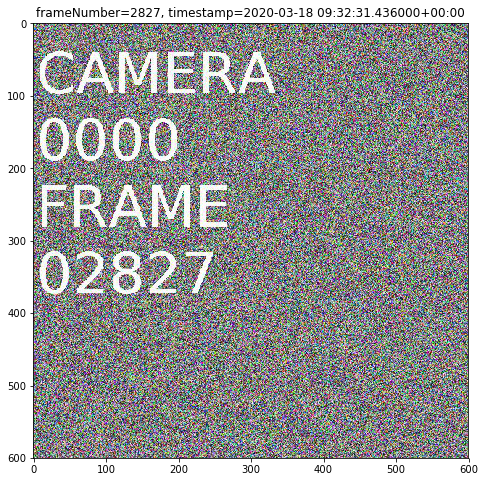

In [ ]:
unindexed_stream.play_video(from_stream_cut=None, to_stream_cut=None, show_frame_interval=5, figsize=(12,8))

# Play video stream from the current time

In [ ]:
# Below is start of video
from_stream_cut_text = 'H4sIAAAAAAAAADOwSq1IzC3ISS3Wz0/KSk0u0U1JLQFS+UW6+aUlBaUlumWZKan5VgZAaGhoamJqYGxpYQIA+ZiLQTYAAAA='
from_stream_cut = pravega.pb.StreamCut(text=from_stream_cut_text)
to_stream_cut = None

In [ ]:
# from_stream_cut = stream_info.tail_stream_cut
# to_stream_cut = None

In [ ]:
unindexed_stream.play_video(from_stream_cut, to_stream_cut, show_frame_interval=10, figsize=(12,8))

# Play video stream from the earliest time and stop at current time

In [ ]:
from_stream_cut = stream_info.head_stream_cut
to_stream_cut = stream_info.tail_stream_cut

In [ ]:
unindexed_stream.play_video(from_stream_cut, to_stream_cut, show_frame_interval=20)